# Data Bootcamp Final Project

#### Natalia Persegani | May 9, 2017

## Contents
1. Prompt
2. Data Source<br />
    2.1. Data Import<br />
    2.2. Data Information
3. Data Analysis<br />
    3.1. Unique Names<br />
    3.2. Breakdown per State<br />
    3.3. Most Popular Names Over Time<br />
    3.4. Most Popular Names in 2015<br />
    3.5. Most Popular Name per State<br />
    3.6. How My Name Has Ranked Over the Years<br />

## 1 | Prompt
The goal of my final project for Data Bootcamp was to analyze how the popularity of various baby names has changed over the past century. As immigration becomes more prominent in the US and the world is more connected, people have been influenced by various generations and cultures, which plays a large role in what they eventually name their child. Mainly, I wanted to see if "traditional" names have maintained their popularity against new and unique names. 

## 2 | Data Source

### 2.1 | Data Import

For my list of baby names, I used the [ZIP file](https://www.ssa.gov/oact/babynames/state/namesbystate.zip) available at [Data.gov](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-data-by-state-and-district-of-).

In [1]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import datetime as dt           # date tools, used to note current date  
import requests                  
from bs4 import BeautifulSoup
import operator
import plotly                                   # just to print version and init notebook
from plotly.offline import iplot, iplot_mpl     # plotting functions
import plotly.graph_objs as go                  # ditto

%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)


In [2]:
import zipfile as zf  
import requests, io

url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
r = requests.get(url) 

In [3]:
# convert bytes to zip file  
babynames = zf.ZipFile(io.BytesIO(r.content)) 
print('Type of zipfile object:', type(babynames))

Type of zipfile object: <class 'zipfile.ZipFile'>


In [4]:
# what's in the zip file?
babynames.namelist()

['GA.TXT',
 'HI.TXT',
 'IA.TXT',
 'ID.TXT',
 'IL.TXT',
 'IN.TXT',
 'KS.TXT',
 'KY.TXT',
 'LA.TXT',
 'MA.TXT',
 'MD.TXT',
 'ME.TXT',
 'MI.TXT',
 'MN.TXT',
 'MO.TXT',
 'MS.TXT',
 'MT.TXT',
 'NC.TXT',
 'ND.TXT',
 'NE.TXT',
 'NH.TXT',
 'NJ.TXT',
 'NM.TXT',
 'NV.TXT',
 'NY.TXT',
 'OH.TXT',
 'OK.TXT',
 'OR.TXT',
 'PA.TXT',
 'RI.TXT',
 'SC.TXT',
 'SD.TXT',
 'TN.TXT',
 'TX.TXT',
 'UT.TXT',
 'VA.TXT',
 'VT.TXT',
 'WA.TXT',
 'WI.TXT',
 'WV.TXT',
 'WY.TXT',
 'AK.TXT',
 'AL.TXT',
 'AR.TXT',
 'AZ.TXT',
 'CA.TXT',
 'CO.TXT',
 'CT.TXT',
 'DC.TXT',
 'DE.TXT',
 'FL.TXT',
 'StateReadMe.pdf']

In [5]:
# combine all state data into one dataframe
babynamesDF = pd.DataFrame()
nameslist = []
for filename in babynames.namelist():                    # loop looking for txt files only 
    if filename.endswith("TXT"):
        df = pd.read_csv(babynames.open(filename),index_col=None,skiprows=[-1],header=None)     # last row is blank
        nameslist.append(df)
        print(df)

babynamesDF = pd.concat(nameslist)

babynamesDF

         0  1     2          3    4
0       GA  F  1910       Mary  841
1       GA  F  1910      Annie  553
2       GA  F  1910     Mattie  320
3       GA  F  1910       Ruby  279
4       GA  F  1910     Willie  275
5       GA  F  1910     Louise  231
6       GA  F  1910     Lillie  222
7       GA  F  1910      Ethel  207
8       GA  F  1910     Bessie  194
9       GA  F  1910       Rosa  190
10      GA  F  1910       Ruth  189
11      GA  F  1910  Elizabeth  184
12      GA  F  1910       Emma  171
13      GA  F  1910      Marie  166
14      GA  F  1910     Minnie  165
15      GA  F  1910     Carrie  163
16      GA  F  1910     Hattie  163
17      GA  F  1910     Fannie  160
18      GA  F  1910      Sarah  158
19      GA  F  1910      Mamie  152
20      GA  F  1910      Alice  150
21      GA  F  1910    Frances  143
22      GA  F  1910    Mildred  133
23      GA  F  1910     Thelma  133
24      GA  F  1910     Bertha  130
25      GA  F  1910     Gladys  130
26      GA  F  1910      Cla

,0,1,2,3,4
0,GA,F,1910,Mary,841
1,GA,F,1910,Annie,553
2,GA,F,1910,Mattie,320
3,GA,F,1910,Ruby,279
4,GA,F,1910,Willie,275
5,GA,F,1910,Louise,231
6,GA,F,1910,Lillie,222
7,GA,F,1910,Ethel,207
8,GA,F,1910,Bessie,194
9,GA,F,1910,Rosa,190


In [6]:
# rename columns
babynamesDF.columns = ["State", "Gender", "Year", "Name", "Quantity"]
babynamesDF

,State,Gender,Year,Name,Quantity
0,GA,F,1910,Mary,841
1,GA,F,1910,Annie,553
2,GA,F,1910,Mattie,320
3,GA,F,1910,Ruby,279
4,GA,F,1910,Willie,275
5,GA,F,1910,Louise,231
6,GA,F,1910,Lillie,222
7,GA,F,1910,Ethel,207
8,GA,F,1910,Bessie,194
9,GA,F,1910,Rosa,190


In [7]:
babynamesDF.dtypes

State       object
Gender      object
Year         int64
Name        object
Quantity     int64
dtype: object

In [8]:
babynamesDF.head(10)

,State,Gender,Year,Name,Quantity
0,GA,F,1910,Mary,841
1,GA,F,1910,Annie,553
2,GA,F,1910,Mattie,320
3,GA,F,1910,Ruby,279
4,GA,F,1910,Willie,275
5,GA,F,1910,Louise,231
6,GA,F,1910,Lillie,222
7,GA,F,1910,Ethel,207
8,GA,F,1910,Bessie,194
9,GA,F,1910,Rosa,190


In [9]:
babynamesDF.tail(10)

,State,Gender,Year,Name,Quantity
191918,FL,M,2015,Yasir,5
191919,FL,M,2015,Yehuda,5
191920,FL,M,2015,Zac,5
191921,FL,M,2015,Zachery,5
191922,FL,M,2015,Zaedyn,5
191923,FL,M,2015,Zamari,5
191924,FL,M,2015,Zayvion,5
191925,FL,M,2015,Zen,5
191926,FL,M,2015,Zuriel,5
191927,FL,M,2015,Zymir,5


### 2.2 | Data Information

This dataset only includes names based on a number of factors:
- Names are only included for those who registerested for a Social Security card, not a requirement prior to 1937
- Very unique names are not included in the dataset. For each state where there are less than 5 instances of a name, the name is ommitted, for privacy reasons
- Names without a state of birth submitted on Social Security Card Application are ommitted from the dataset

All of these factors mean that the analysis and calculations will be skewed, and will not represent 100% of the US  population.

## 3 | Data Analysis

There are numerous different ways to break down the data. I was interested in exploring the different combinations below:

1. Total unique names 
- Gender breakdown per state
- Most popular names over time
- Most popular names in most recent year
- Interactive heat map with most popular name broken down by state
- How my name has ranked over the years

### 3.1 | Unique Names

To start diving into the data, I decided to start small: how many names are present in the dataset by gender?

In [10]:
# unique names by gender
babynamesDF.groupby('Gender').Name.nunique()

Gender
F    20279
M    13334
Name: Name, dtype: int64

In [11]:
# sum quantity of names by gender
print('Number of F names:', babynamesDF.loc[babynamesDF['Gender'] == 'F', 'Quantity'].sum())
print('Number of M names:', babynamesDF.loc[babynamesDF['Gender'] == 'M', 'Quantity'].sum())

Number of F names: 145235866
Number of M names: 156801378


While there were 145,235,866 women and 156,801,378 men born between 1910 and 2015, there are only 20,279 female names and 13,334 male names for the 105 year timeline. That means that, if the names were spread evenly, 7,162 women would share the same name while 11,760 men would share the same name. Clearly, there is a lot more variation in the names given to women.

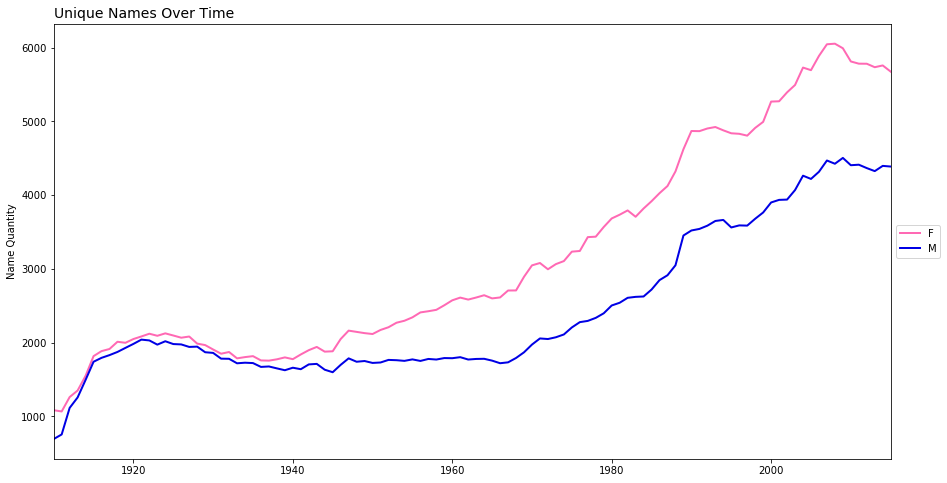

In [12]:
# line chart of baby names per year by gender
yrgd = babynamesDF.groupby(['Year', 'Gender']).Name.nunique()

# move gender to column headers
yrgd= yrgd.unstack(level='Gender')

fig, ax = plt.subplots(figsize = (15,8))

yrgd['F'].plot(ax=ax, color='#ff69b4', linewidth=2)
yrgd['M'].plot(ax=ax, color='#0000e5', linewidth=2)

ax.set_ylabel('Name Quantity')
ax.set_xlabel('')
ax.set_title('Unique Names Over Time', fontsize=14, loc='left')

# Put the legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

As can be seen by the graph, more unique names have been given to children as of the 1950s. Despite more men having been born in the past century, it is clear there is a lot more variation in the names given to women than men.

### 3.2 | Breakdown per State

After looking at the breakdown of names by gender on a national level, I wanted to take a deeper look into the names by state. I decided to break it down by the number of names in each state versus the number of people in each state, both broken down by gender.

In [13]:
# bar chart of baby names per year by gender
stategd = babynamesDF.groupby(['State', 'Gender']).Name.nunique()

# move year to column headers
stategd = stategd.unstack(level='Gender')

stategd

Gender,F,M
State,,
AK,940,704
AL,4293,2760
AR,3128,2066
AZ,3612,2198
CA,12882,7780
CO,3250,2015
CT,2241,1471
DC,1664,1307
DE,1019,717


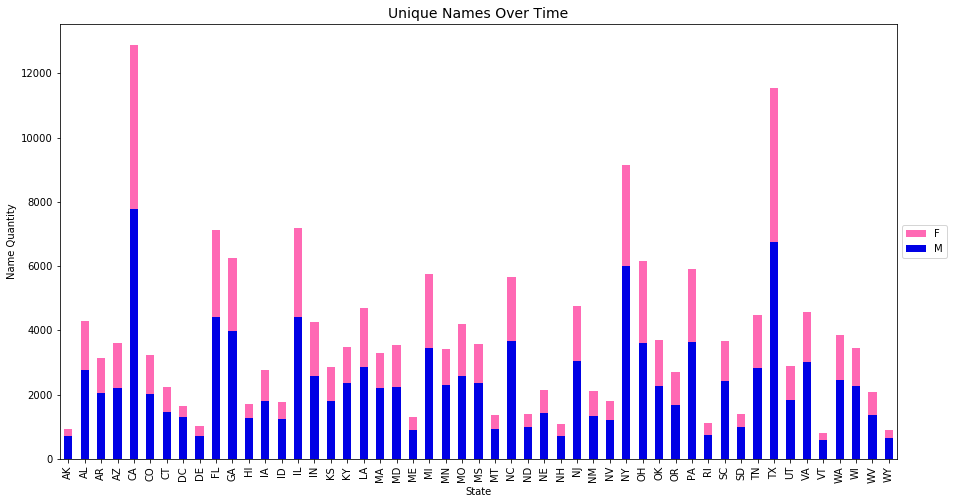

In [14]:
fig, ax = plt.subplots(figsize = (15,8))

stategd['F'].plot(ax=ax, color='#ff69b4', kind='bar')
stategd['M'].plot(ax=ax, color='#0000e5', kind='bar')

ax.set_ylabel('Name Quantity')
ax.set_xlabel('State')
ax.set_title('Unique Names Over Time', fontsize=14, loc='center')

# Put the legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

As was seen in the line graph above, on a per state level, there is still a greater variation in the names given to women than men. Every single state has registered more unique names for women than men, with outliers being California, New York, and Texas, some of the most populous states.

### 3.3 | Most Popular Names Over Time

I also wanted to see, on a national level, what the most popular names of all time have been. For the most popular names of the last century, I also wanted to see how they have ranked over the years. 

In [15]:
# top 5 names for all time
namesalltime = babynamesDF[["Gender", "Name", "Year", "Quantity"]]                     # extract columns
namesalltime = namesalltime.pivot_table('Quantity', ['Name', 'Gender'], 'Year', fill_value=0)        # move years to column headers
namesalltime = namesalltime.astype(int)
namesalltime['Total'] = namesalltime.sum(axis=1)                                      # sum across years
namesalltime = namesalltime.sort_values(by = "Total", ascending = False)               # sort Total column descending
namesalltime = namesalltime.reset_index()

namesalltime

Year,Name,Gender,1910,1911,1912,1913,1914,1915,1916,1917,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Total
0,James,M,183,195,345,408,514,662,697,732,...,312,297,278,271,259,262,265,282,288,97091
1,John,M,224,263,482,575,744,932,981,1016,...,282,260,237,226,216,207,209,209,202,94862
2,Robert,M,110,133,256,313,415,563,622,690,...,183,172,153,147,136,138,131,129,119,92462
3,Michael,M,41,55,62,75,100,106,99,106,...,430,403,370,339,328,316,303,301,280,84950
4,William,M,173,207,384,461,583,756,792,831,...,370,360,351,334,339,330,325,328,309,75346
5,Mary,F,448,478,633,718,889,1140,1204,1260,...,74,71,64,58,61,55,57,52,55,73221
6,David,M,28,34,59,66,83,107,118,119,...,343,319,302,277,258,245,241,238,229,69919
7,Richard,M,35,42,85,102,133,179,202,218,...,90,82,72,65,64,62,57,57,59,49705
8,Joseph,M,106,132,241,289,369,452,468,485,...,339,324,292,270,253,245,239,236,223,48838
9,Charles,M,97,116,217,263,332,430,462,473,...,146,142,142,139,136,135,137,143,139,44157


In [16]:
namessub = babynamesDF[["Name", "Year", "Quantity"]]
namessub = namessub.pivot_table('Quantity', ['Year'], 'Name', fill_value=0)
namessub = namessub.astype(int)

namessub

Name,Aaban,Aadan,Aadarsh,Aaden,Aadhav,Aadhya,Aadi,Aadil,Aadin,Aadit,...,Zyonna,Zyquan,Zyquavious,Zyra,Zyrah,Zyren,Zyria,Zyriah,Zyron,Zyshonne
Year,,,,,,,,,,,,,,,,,,,,,
1910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


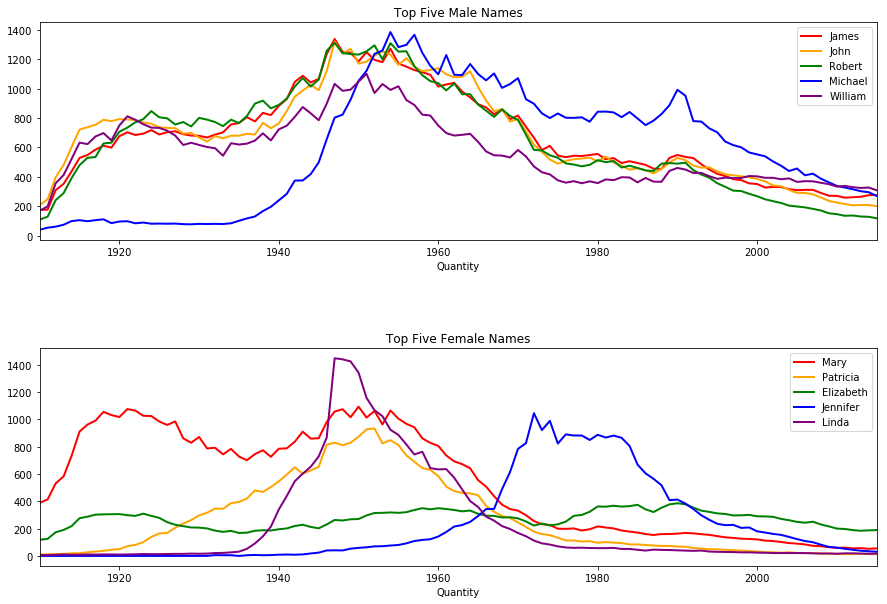

In [17]:
# line chart of top 5 all time names per year by gender

fig, ax = plt.subplots(2, 1, figsize = (15, 10))

namessub['James'].plot(ax=ax[0], color='red', linewidth=2)
namessub['John'].plot(ax=ax[0], color='orange', linewidth=2)
namessub['Robert'].plot(ax=ax[0], color='green', linewidth=2)
namessub['Michael'].plot(ax=ax[0], color='blue', linewidth=2)
namessub['William'].plot(ax=ax[0], color='purple', linewidth=2)

namessub['Mary'].plot(ax=ax[1], color='red', linewidth=2)
namessub['Patricia'].plot(ax=ax[1], color='orange', linewidth=2)
namessub['Elizabeth'].plot(ax=ax[1], color='green', linewidth=2)
namessub['Jennifer'].plot(ax=ax[1], color='blue', linewidth=2)
namessub['Linda'].plot(ax=ax[1], color='purple', linewidth=2)

fig.subplots_adjust(hspace=.5)

ax[0].set_title('Top Five Male Names')
ax[1].set_title('Top Five Female Names')

ax[0].set_xlabel('Quantity')
ax[1].set_xlabel('Quantity')

ax[0].legend(loc = 'best')
ax[1].legend(loc = 'best')


While the popular names for men have remained popular, there has been great variation in the names gien to women. Despite these five names being the most popular over the past century, there is a clear peak for each and decline, clearly seen by the female names. The top five names for each gender were: 

**Men**
1. James | 97,091
- John | 94,862
- Robert | 92,462
- Michael | 84,950
- William | 75,346


**Women**
1. Mary | 73,221
- Patricia | 30,975
- Elizabeth | 29,655
- Jennifer | 28,883
- Linda | 28,829

### 3.4 | Most Popular Names in 2015

I also wanted to check the most popular names in the dataset for the most recent year. 

In [18]:
# most popular names for most recent year
nameyr = babynamesDF[["Gender","Name","Year","Quantity"]]
yrvariable = [2015]
nameyr = nameyr[nameyr['Year'].isin(yrvariable)].set_index('Name').sort_values(by='Quantity', ascending=False)
nameyr

,Gender,Year,Quantity
Name,,,
Sophia,F,2015,2942
Mia,F,2015,2850
Noah,M,2015,2751
Emma,F,2015,2706
Jacob,M,2015,2540
Olivia,F,2015,2507
Ethan,M,2015,2467
Daniel,M,2015,2460
Matthew,M,2015,2414


We can see what the top five names were in 2015, the most recent year in the dataset, for men and women:

**Women**
1. Sophia | 2,942
- Mia | 2,850
- Emma | 2,706
- Olivia | 2,507
- Isabella | 2,388

**Men**
1. Noah | 2,751
- Jacob | 2,540
- Ethan | 2,467
- Daniel | 2,460
- Matthew | 2,414

Not a single name in the top 5 for the most recent year is part of the most popular names of all time, a clear indication of how there has been greater variety in the names given to both men and women.

### 3.5 | Most Popular Name Per State

I was also interested in finding the most popular name per state. 

In [21]:
# heat map with most popular name by state for all time

heatmap = babynamesDF[["State", "Name", "Gender", "Year", "Quantity"]]                 # extract columns
heatmap = heatmap.pivot_table('Quantity', ["State", 'Name', 'Gender'], 'Year')         # move years to column headers
heatmap['Total']  = heatmap.sum(axis=1)                                                # sum across years
heatmapsub = heatmap[["Total"]]
heatmapsub = heatmapsub.reset_index()
heatmapsub = heatmapsub.sort_values(['State', 'Total'], ascending=[True, False])       # sort Total column descending
heatmapsub = heatmapsub.groupby('State').head(1)

heatmapsub

Year,State,Name,Gender,Total
1171,AK,Michael,M,8114.0
4694,AL,James,M,156990.0
10971,AR,James,M,84918.0
18038,AZ,Michael,M,45072.0
33661,CA,Michael,M,424070.0
44114,CO,Michael,M,48662.0
47445,CT,John,M,79610.0
50736,DC,John,M,34226.0
53172,DE,John,M,15159.0
62000,FL,Michael,M,140838.0


In [22]:
for col in heatmapsub.columns:
    heatmapsub[col] = heatmapsub[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[1.0, 'rgb(84,39,143)']]

heatmapsub['text'] = heatmapsub['State'] + '<br>' + heatmapsub['Name'] + '<br>'+ heatmapsub['Total']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = heatmapsub['State'],
        z = heatmapsub['Total'].astype(float),
        locationmode = 'USA-states',
        text = heatmapsub['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Top Name per State")
        ) ]

layout = dict(
        title = 'Top Name per State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
iplot(go.Figure(data=data, layout=layout), link_text="")

With the exception of one state (New Mexico - Mary), all other states had a male name as the most popular name, which was one of the most popular names over the last century: James, John, Robert, Michael, or William.

### 3.6 | How My Name Has Ranked Over the Years

Lastly, given my name is not a very traditional American name (Natalia), I was interested to see if it was present in the dataset for every year. I was surprised to find that there were far more Natalias in the last century than I'd expected.

In [23]:
# how my name has ranked over time
natalia = babynamesDF[["Name", "State", "Year", "Quantity"]]                # extract columns
natalia = natalia.pivot_table('Quantity', ['Name', "Year"], 'State', fill_value=0)       # move years to column headers
natalia = natalia.astype(int)
natalia['Total']  = natalia.sum(axis=1)                                                # sum across years
natalia = natalia[["Total"]]
natalia = natalia.reset_index()
natalia = natalia.set_index("Name").loc["Natalia"]
natalia = natalia.reset_index()
natalia = natalia.set_index("Year")


natalia

State,Name,Total
Year,,
1911,Natalia,8
1912,Natalia,6
1913,Natalia,5
1914,Natalia,5
1915,Natalia,5
1916,Natalia,6
1917,Natalia,28
1918,Natalia,5
1919,Natalia,23


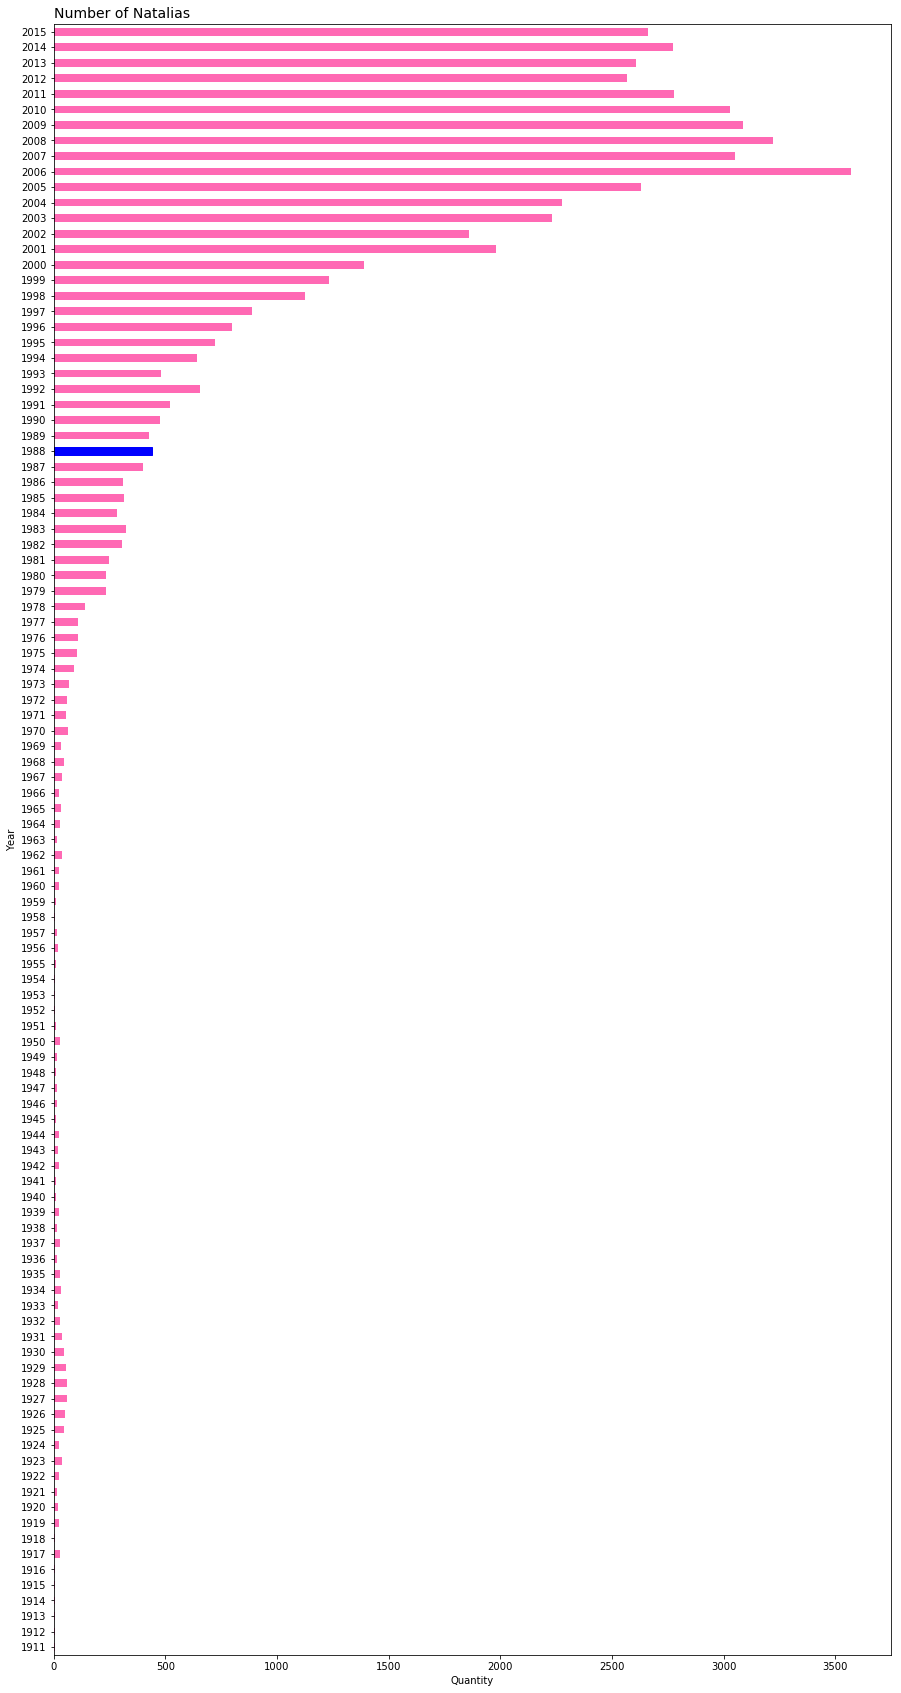

In [24]:
fig, ax = plt.subplots(figsize = (15,30))

natalia['Total'].plot(ax=ax, color='#ff69b4', kind='barh')

ax.set_ylabel('Year')
ax.set_xlabel('Quantity')
ax.set_title('Number of Natalias', fontsize=14, loc='left')

birthyr = natalia.index.tolist().index(1988)
ax.get_children()[birthyr].set_color('blue')